# **Handwritten Digit Classification**

## **Import Required Libraries**

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

## **Load MNIST Handwritten Digit Data**

In [77]:
# Store the MNIST data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

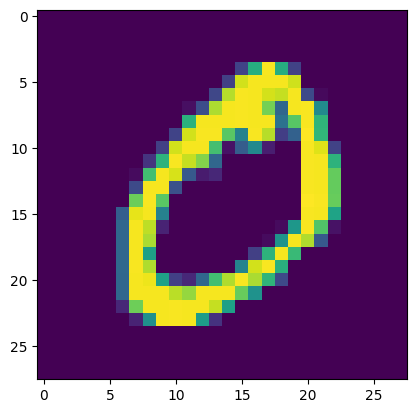

In [78]:
# Plot a digit
plt.imshow(X_train[1, :, :])
plt.show()

## **Scale the Pixel Values**

In [79]:
# Normalize the values
X_train = X_train / 255
X_test = X_test / 255

## **Build an ANN Model**

In [80]:
# Initialize a model
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))    # Input Layer
model.add(Dense(128, activation="relu"))    # First Hidden Layer
model.add(Dense(64, activation="relu"))     # Second Hidden Layer
model.add(Dense(32, activation="relu"))     # Third Hidden Layer
model.add(Dense(10, activation="softmax"))  # Output Layer

In [81]:
# Summarize the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
# Compile the model
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Fit the training data
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2778 - accuracy: 0.9172 - val_loss: 0.1513 - val_accuracy: 0.9541
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1140 - accuracy: 0.9652 - val_loss: 0.1064 - val_accuracy: 0.9702
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0809 - accuracy: 0.9755 - val_loss: 0.0960 - val_accuracy: 0.9722
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0621 - accuracy: 0.9803 - val_loss: 0.0963 - val_accuracy: 0.9714
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0489 - accuracy: 0.9841 - val_loss: 0.1097 - val_accuracy: 0.9712
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0407 - accuracy: 0.9871 - val_loss: 0.1050 - val_accuracy: 0.9725
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.0862 - val_accuracy:

In [87]:
# Predict the test data
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_pred

313/313 [==============================] - 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6])

## **Accuracy Score**

In [88]:
# Calculate the accuracy of model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9775

Text(0, 0.5, 'Loss')

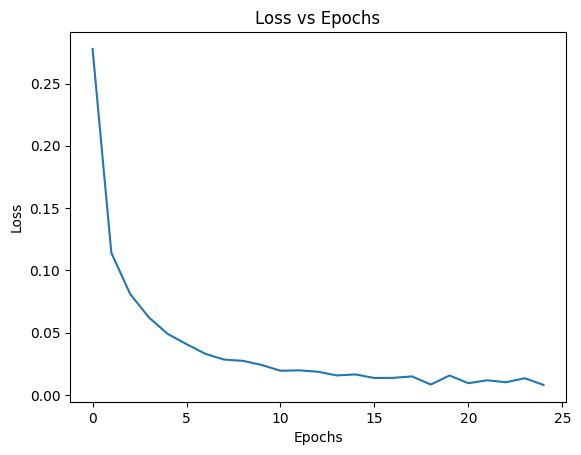

In [89]:
# Plot the 'Loss' with respect to 'Epochs'
sns.lineplot(history.history["loss"])
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

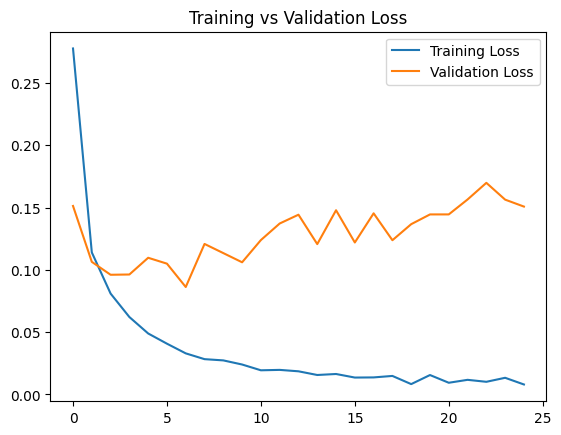

In [90]:
# Plot the training loss with respect to validation loss
sns.lineplot(history.history["loss"], label="Training Loss")
sns.lineplot(history.history["val_loss"], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.show()

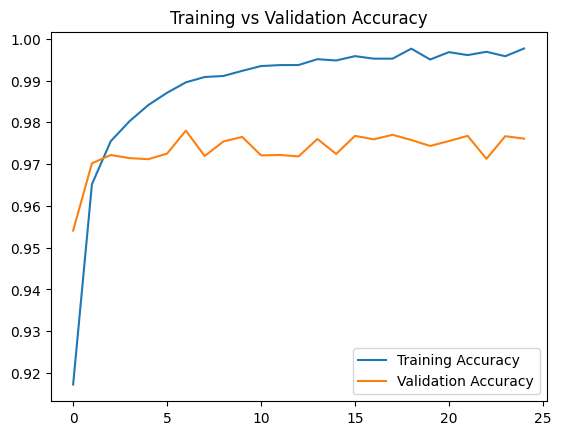

In [92]:
# Plot the training loss with respect to validation loss
sns.lineplot(history.history["accuracy"], label="Training Accuracy")
sns.lineplot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.show()

## **Model Prediction**

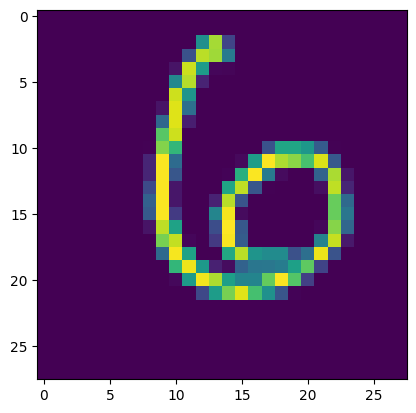

1/1 [==============================] - 0s 16ms/step


array([6])

In [104]:
# Plot a random image from the test data
plt.imshow(X_test[100])
plt.show()

In [107]:
# Predict the image with the model
np.argmax(model.predict(X_test[100].reshape(1, 28, 28)), axis=1)

1/1 [==============================] - 0s 14ms/step


array([6])